# In-Class Quiz Nº 2

<hr style="border:1px  solid black"> </hr>

### (Fill in)
## Name: 
## Number: 

<hr style="border:1px  solid black"> </hr>

## Develop and run the requested code in the cells immediately below the questions.

# IMPORTANTE:
## Once completed, save this Jupyter notebook with the following name:
## Axxxxx-Q2.ipynb (Axxxxx: student number)
##  and then upload the file to the Moodle link provided for that purpose.

<hr style="border:2px solid black"> </hr>

# Data: MNIST dataset (small version) - pickle file $\texttt{MNISTsmall.p}$
## This file has the following variables (in a dictionary)
* ### X1: training data ($1000\times784$  uint8 array)
* ### y1: classes of the training data (numbers 0 to 9)
* ### X2: test data ($5000\times784$ uint8 array)
* ### y2: classes of the test data (numbers 0 to 9)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, roc_curve
from sklearn.model_selection import  train_test_split
from sklearn.svm import LinearSVC
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
import pickle
from time import time

#load data
D=pickle.load(open('MNISTsmall.p','rb'))
X1=D.X1*1.
X2=D.X2*1.
y1=D.y1
y2=D.y2

# Question 1: Binary Classification
##  Consider the examples of class three (3) as the positive class and the remaning classes as the negative examples.
### a) Use the training set to find which dimensions of the data have a variance less than one hundred (100). Print this number and remove these dimensions from the training and test sets.
### b) Use the training data to train a $\texttt{LinearSVC}$ classifier with the following parameters: $\texttt{random_state=42}$ and $\texttt{C=0.1}$. Print the total number of errors and the confusion matrix for the test data.
### c) Plot the ROC curve of this classifier with the test data. Include in this plot the operating point of the classifier.
### d) Pre-process the data of item 1.a) using the function  $\texttt{StandardScaler}$. Train this function with the training data and apply the transformation to the training and test sets. Use the new training data to train a $\texttt{LinearSVC}$ classifier with the following parameters: $\texttt{random_state=42}$ and $\texttt{C=0.1}$. Print the total number of errors and the confusion matrix for the new test data.
### e) In the same figure, plot the ROC curves of the classifiers of item 1.b) and 1.d) with the respective test data. Include in this plot the operational points of both classifiers.

In [2]:
#binary labels
y1b=(y1==3)*1
y2b=(y2==3)*1

## 1.a)

In [3]:
v=np.var(X1,axis=0)
thres=100
idx=v<thres
print('Number of dimensions with variance less da %d:'%thres,np.sum(idx))
X1b=X1[:,~idx]
X2b=X2[:,~idx]
print(X1b.shape,X2b.shape)


Number of dimensions with variance less da 100: 258
(10000, 526) (5000, 526)


## 1.b)

In [4]:
st=time()
svm=LinearSVC(C=0.1,random_state=42)
svm.fit(X1b,y1b)
y2be=svm.predict(X2b)
et=time()
print('Time (train/test): %.3f secs'%(et-st))
print('Total number of erros:',np.sum(y2b!=y2be))
CM1=confusion_matrix(y2b,y2be)
print('Confusion Matrix:\n',CM1)

Time (train/test): 1.885 secs
Total number of erros: 216
Confusion Matrix:
 [[4382  118]
 [  98  402]]


/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


## 1.c)

Text(0, 0.5, 'TP-rate')

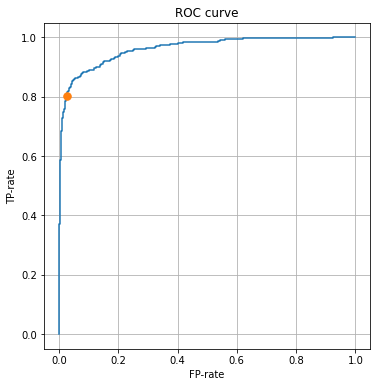

In [5]:
#r2c=rfc.predict_proba(X2b)[:,1]
r2c=svm.decision_function(X2b)
fpr1,tpr1,t=roc_curve(y2b,r2c)

#Classificador 1
#fp-rate=FP/(FP+TN)
f1=CM1[0,1]/(CM1[0,0]+CM1[0,1])
#tp-rate=TP/(TP+FN)
r1=CM1[1,1]/(CM1[1,1]+CM1[1,0])

plt.figure(figsize=(6,6))
plt.plot(fpr1,tpr1)
plt.plot(f1,r1,'.',ms=15)
plt.axis('scaled')
plt.grid(True)
plt.title('ROC curve')
plt.xlabel('FP-rate')
plt.ylabel('TP-rate')

## 1.d)

In [6]:
sc=StandardScaler().fit(X1b)
X1c=sc.transform(X1b)
X2c=sc.transform(X2b)

st=time()
svm=LinearSVC(C=0.1,random_state=42)
svm.fit(X1c,y1b)
y2be=svm.predict(X2c)
et=time()
print('Time (train/test): %.3f secs'%(et-st))
print('Total number of erros:',np.sum(y2b!=y2be))
CM2=confusion_matrix(y2b,y2be)
print('Confusion Matrix:\n',CM2)


Time (train/test): 3.572 secs
Total number of erros: 208
Confusion Matrix:
 [[4403   97]
 [ 111  389]]


/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


## 1.e)

Text(0, 0.5, 'TP-rate')

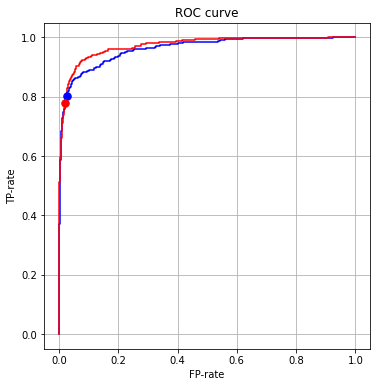

In [7]:
r2c=svm.decision_function(X2c)
fpr2,tpr2,t=roc_curve(y2b,r2c)

#Classificador 2
f2=CM2[0,1]/(CM2[0,0]+CM2[0,1])
#tp-rate=TP/(TP+FN)
r2=CM2[1,1]/(CM2[1,1]+CM2[1,0])

plt.figure(figsize=(6,6))
plt.plot(fpr1,tpr1,'b')
plt.plot(fpr2,tpr2,'r')
plt.plot(f1,r1,'.b',ms=15)
plt.plot(f2,r2,'.r',ms=15)
plt.axis('scaled')
plt.grid(True)
plt.title('ROC curve')
plt.xlabel('FP-rate')
plt.ylabel('TP-rate')

<hr style="border:2px solid black"> </hr>

# Question 2 - Multi-Class Classification:
## Consider the original train and test datasets form the $\texttt{MNISTsmall.p}$ (10 classes).
### a) Pre-process the data using the function  $\texttt{PCA}$. Train this function with the training data and apply the transformation to the training and test sets. Preseve only the first 50 principal componentes of the data. Use the pre-processed data in the following items.
### b) Train with the training set a $\texttt{RandomForestClassifier}$ with the following parameters: $\texttt{random_state=42}$ and $\texttt{max_depth=10}$. Print the total number of errors and the confusion matrix for the test data.
### c)  Divide the training set in two: a training and a validation set. Use the function $\texttt{train_test_split}$ with the following parameters: $\texttt{train_size=7000}$, $\texttt{random_state=42}$ and $\texttt{stratify=y1}$
### d) Use the training set of the previous item to train the $\texttt{RandomForestClassifier}$ (with $\texttt{random_state=42}$ and $\texttt{max_depth=10}$) and check which value for the parameter $\texttt{n_estimators}$ gives the best score in the validation set. Test the following values for the parameter $\texttt{n_estimators}$: 200, 225, 250, 275 and 300.
### e) Re-train with the whole training set (10000 examples) the $\texttt{RandomForestClassifier}$ (with $\texttt{random_state=42}$ and $\texttt{max_depth=10}$) with the best value obtained in the previous item for the parameter $\texttt{n_estimators}$.  Print the total number of errors and the confusion matrix for the test data.

## 2.a)

In [7]:
pca=PCA(n_components=50).fit(X1)
X1p=pca.transform(X1)
X2p=pca.transform(X2)


## 2.b)

In [8]:
st=time()
#svm=SVC(kernel='rbf',C=5,random_state=42).fit(X1p,y1)
#y2e=svm.predict(X2p)
rfc=RandomForestClassifier(random_state=42,max_depth=10).fit(X1p,y1)
y2e=rfc.predict(X2p)
et=time()
print('Time (train/test): %.3f secs'%(et-st))
print('Total number of erros:',np.sum(y2!=y2e))
CM=confusion_matrix(y2,y2e)
print('Confusion Matrix:\n',CM)


Time (train/test): 5.194 secs
Total number of erros: 607
Confusion Matrix:
 [[476   0   3   1   1   4   7   1   3   4]
 [  0 486   2   5   0   2   2   0   3   0]
 [  3   2 422  18   4   1   5  10  32   3]
 [  2   0   4 439   1  23   3   5  20   3]
 [  0   2   4   4 428   4  11   1   4  42]
 [  6   1   3  21  12 430   4   8   6   9]
 [ 10   2   6   1   8  16 454   1   2   0]
 [  0  15  19   4   2   5   1 428  11  15]
 [  5   0  13  32   7  15   4   4 404  16]
 [  4   6   2  15  26   7   2   7   5 426]]


## 2.c)

In [9]:
X1pa,X1pb,y1a,y1b=train_test_split(X1p,y1,train_size=7000,stratify=y1,random_state=42)

## 2.d)

In [10]:
nEst=np.arange(200,301,25)
topScore=0
for nE in nEst:
    rfc=RandomForestClassifier(random_state=42,max_depth=10,n_estimators=nE).fit(X1pa,y1a)
    currentScore=rfc.score(X1pb,y1b)
    print(currentScore,nE)
    if currentScore>topScore:
        topScore=currentScore
        bestEst=nE
print('Best Number of Estimators:',bestEst)

0.901 200
0.9006666666666666 225
0.9023333333333333 250
0.9023333333333333 275
0.9016666666666666 300
Best Number of Estimators: 250


## 2.e)

In [11]:
st=time()
rfc=RandomForestClassifier(random_state=42,max_depth=10,n_estimators=bestEst).fit(X1p,y1)
y2e=rfc.predict(X2p)
et=time()
print('Time (train/test): %.3f secs'%(et-st))
print('Total number of erros:',np.sum(y2!=y2e))
CM=confusion_matrix(y2,y2e)
print('Confusion Matrix:\n',CM)


Time (train/test): 13.626 secs
Total number of erros: 598
Confusion Matrix:
 [[478   0   2   1   0   3   9   1   4   2]
 [  0 485   2   7   0   1   2   0   3   0]
 [  2   1 430  16   3   1   5   9  30   3]
 [  2   0   2 443   1  22   4   6  16   4]
 [  1   3   6   4 428   5  11   1   3  38]
 [  6   1   2  19  13 430   4   9   7   9]
 [  9   2   4   1   9  18 455   0   2   0]
 [  1  15  17   3   3   2   1 425  17  16]
 [  6   0  16  25   7  14   4   3 405  20]
 [  3   7   1  13  32   8   2   5   6 423]]
